In [1]:
import torch
from matplotlib import pyplot as plt
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_swiss_roll
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from typing import Tuple
import seaborn as sns
from tqdm import trange
import torchvision
import torchvision.transforms as transforms
import os
import pandas as pd
from torchvision import datasets

data_dir = "./data"


print("pyTorch Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA Device Count:", torch.cuda.device_count())
    print("CUDA Current Device:", torch.cuda.current_device())
    print("CUDA Device Name:", torch.cuda.get_device_name(0))
        

    print("pyTorch Version: ", torch.__version__)
    print("pyTorch CUDA Version: ", torch.version.cuda)
#torch.cuda.set_device(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

pyTorch Available: True
CUDA Device Count: 1
CUDA Current Device: 0
CUDA Device Name: NVIDIA GeForce RTX 4050 Laptop GPU
pyTorch Version:  2.5.1
pyTorch CUDA Version:  12.1
cuda


In [2]:
csv_dir = "./data_preparation"

train_df = pd.read_csv(os.path.join(csv_dir, "train_data.csv"))


print(f"Training DataFrame shape: {train_df.shape}")

print("CSV files loaded successfully from the data_preparation folder!")

Training DataFrame shape: (60000, 785)
CSV files loaded successfully from the data_preparation folder!


In [6]:
class_to_idx = torchvision.datasets.FashionMNIST(
    root= data_dir, 
    train=True, 
    download=True).class_to_idx
idx_to_class = {v: k for k, v in class_to_idx.items()}
print(f"Mapping of class to index: {class_to_idx}")
print(f"Index to class mapping: {idx_to_class}")
label = list(class_to_idx.keys())
print(label)

Mapping of class to index: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
Index to class mapping: {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
print(train_df.head())

   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4   pixel_5  pixel_6  \
0      9      0.0      0.0      0.0      0.0      0.0  0.000000      0.0   
1      0      0.0      0.0      0.0      0.0      0.0  0.003922      0.0   
2      0      0.0      0.0      0.0      0.0      0.0  0.000000      0.0   
3      3      0.0      0.0      0.0      0.0      0.0  0.000000      0.0   
4      0      0.0      0.0      0.0      0.0      0.0  0.000000      0.0   

   pixel_7   pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0      0.0  0.000000  ...   0.000000   0.000000   0.000000   0.000000   
1      0.0  0.000000  ...   0.466667   0.447059   0.509804   0.298039   
2      0.0  0.000000  ...   0.000000   0.000000   0.003922   0.000000   
3      0.0  0.129412  ...   0.000000   0.000000   0.000000   0.000000   
4      0.0  0.000000  ...   0.000000   0.000000   0.000000   0.000000   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0        0.0        0.0        0.0

In [7]:
print(f"Shape of the train dataset: {train_df.shape}")

Shape of the train dataset: (60000, 785)


In [8]:
# Save the data points as 'input_data'
input_data = train_df.iloc[:,1:] / 255
# Check the shape of the input data
print('Shape of the input data',input_data.shape)
# Preview a few rows
input_data.head()

Shape of the input data (60000, 784)


pixel_0  pixel_1  pixel_2  pixel_3  pixel_4   pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0  0.000015      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0  0.000000      0.0      0.0   

    pixel_8   pixel_9  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0  0.000000  0.000000  ...    0.00000   0.000000   0.000000   0.000000   
1  0.000000  0.000000  ...    0.00183   0.001753   0.001999   0.001169   
2  0.000000  0.000338  ...    0.00000   0.000000   0.000015   0.000000   
3  0.000507  0.001476  ...    0.00000   0.000000   0.000000   0.000000   
4  0.000000  0.000000  ...    0.00000   0.000000   0.000000   0.000000   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0        0.0        0.0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0        0.0        0.0  

[5 rows x 784 columns]

In [9]:
# Save the label(in 0-9 format) as 'target'
target = train_df[['label']].iloc[:, :]
# Check the shape of the label/category
print('Shape of the input label', target.shape)
# Preview a few rows
target.head()

Shape of the input label (60000, 1)


label
0      9
1      0
2      0
3      3
4      0

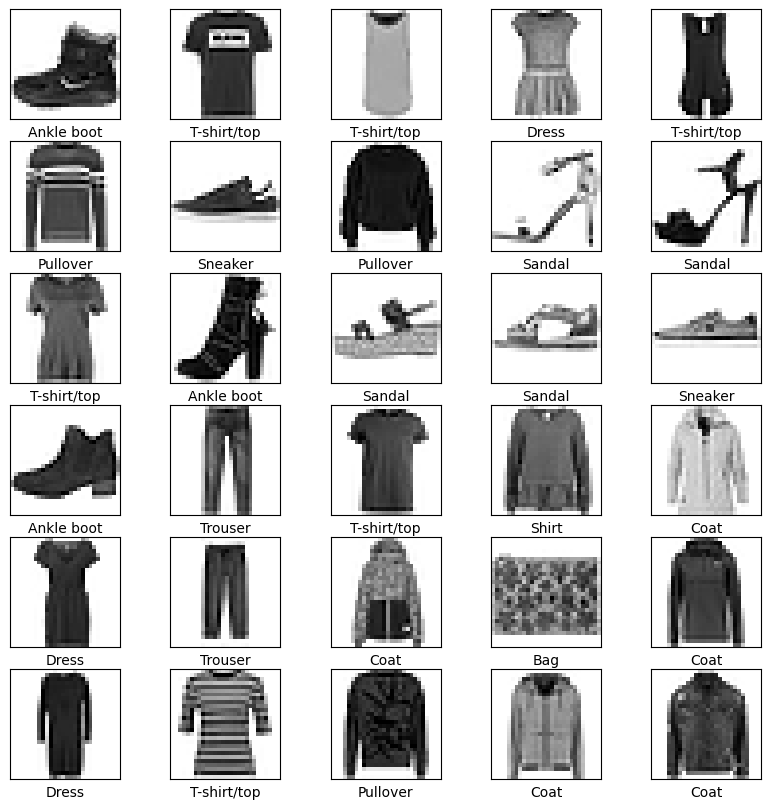

In [11]:
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(input_data.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target.label.iloc[i]])